## Final Project Submission

Please fill out:
* Student name: Yvonne Rajula
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Brian Chacha and Lians Wanjiku
* Blog post URL:


## Business Problem Statement

### Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### Importing Libraries

In [213]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns



### Loading Data

In [214]:
df = pd.read_csv('data\Aviation_Data.csv', low_memory=False)

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Exploring the data

In [215]:
df.info()

    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [216]:
df["Country"].value_counts()


United States               82248
Brazil                        374
Canada                        359
Mexico                        358
United Kingdom                344
                            ...  
Gibraltar                       1
Bosnia And Herzegovina          1
Turks and Caicos Islands        1
Corsica                         1
Niger                           1
Name: Country, Length: 219, dtype: int64

In [217]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Data Cleaning

In [218]:
df.duplicated().sum()

1390

In [219]:
df=df.drop_duplicates()

In [220]:
df.duplicated().sum()

0

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88958 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [222]:
df.isnull().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

In [223]:
#Drop unwanted columns
columns_to_drop = [
    'Event.Id',
    'Investigation.Type',
    'Accident.Number',
    'Airport.Code',
    'Airport.Name',
    'FAR.Description',
    'Schedule',
    'Air.carrier',
    'Report.Status',
    'Publication.Date','Latitude','Longitude','Aircraft.Category','Registration.Number'
]

df=df.drop(columns=columns_to_drop)

df.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [224]:
df.isnull().sum()

Event.Date                   69
Location                    121
Country                     295
Injury.Severity            1069
Aircraft.damage            3263
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
Purpose.of.flight          6261
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
dtype: int64

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88837 non-null  object 
 2   Country                 88663 non-null  object 
 3   Injury.Severity         87889 non-null  object 
 4   Aircraft.damage         85695 non-null  object 
 5   Make                    88826 non-null  object 
 6   Model                   88797 non-null  object 
 7   Amateur.Built           88787 non-null  object 
 8   Number.of.Engines       82805 non-null  float64
 9   Engine.Type             81812 non-null  object 
 10  Purpose.of.flight       82697 non-null  object 
 11  Total.Fatal.Injuries    77488 non-null  float64
 12  Total.Serious.Injuries  76379 non-null  float64
 13  Total.Minor.Injuries    76956 non-null  float64
 14  Total.Uninjured         82977 non-null

In [226]:

continous_col =['Number.of.Engines','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']

df[continous_col]=df[continous_col].fillna(df[continous_col].mean())

In [227]:
df.isnull().sum()

Event.Date                   69
Location                    121
Country                     295
Injury.Severity            1069
Aircraft.damage            3263
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines             0
Engine.Type                7146
Purpose.of.flight          6261
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4561
Broad.phase.of.flight     27234
dtype: int64

In [228]:
df=df.dropna()

In [229]:
df.isnull().sum()

Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58794 entries, 0 to 63911
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              58794 non-null  object 
 1   Location                58794 non-null  object 
 2   Country                 58794 non-null  object 
 3   Injury.Severity         58794 non-null  object 
 4   Aircraft.damage         58794 non-null  object 
 5   Make                    58794 non-null  object 
 6   Model                   58794 non-null  object 
 7   Amateur.Built           58794 non-null  object 
 8   Number.of.Engines       58794 non-null  float64
 9   Engine.Type             58794 non-null  object 
 10  Purpose.of.flight       58794 non-null  object 
 11  Total.Fatal.Injuries    58794 non-null  float64
 12  Total.Serious.Injuries  58794 non-null  float64
 13  Total.Minor.Injuries    58794 non-null  float64
 14  Total.Uninjured         58794 non-null

### Data visualization

In [231]:
df['Event.Date']=pd.to_datetime(df['Event.Date']) # converting to datetime from text
df['Event.Date'].dt.month #converting to the months

0        10
1         7
2         8
3         6
6         8
         ..
63906    12
63908    12
63909    12
63910    12
63911    12
Name: Event.Date, Length: 58794, dtype: int64

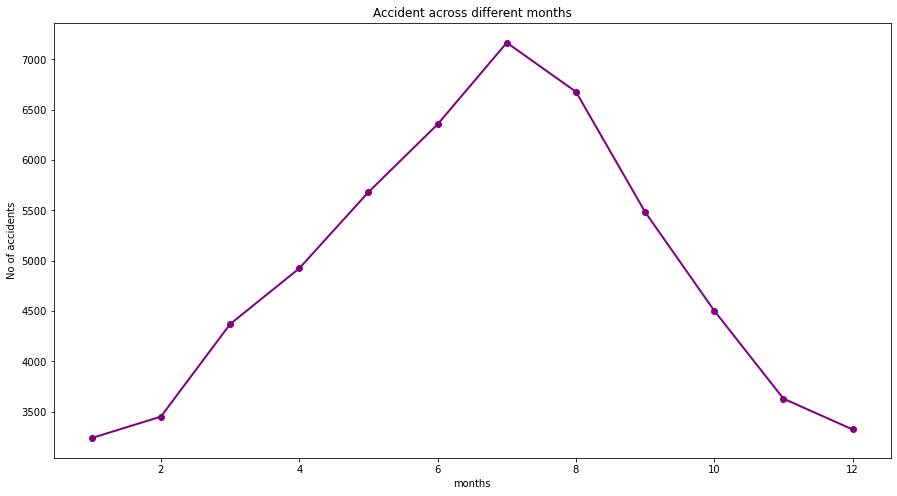

In [232]:
monthly_accidents=df['Event.Date'].dt.month.value_counts().sort_index()

x=monthly_accidents.index
y=monthly_accidents.values

plt.figure(figsize=(15,8))

plt.plot(x,y, marker='o',color='purple',linewidth=2)
plt.title('Accident across different months')
plt.xlabel('months')
plt.ylabel('No of accidents')


plt.show()

 Majority of the accidents happened in the month of July 

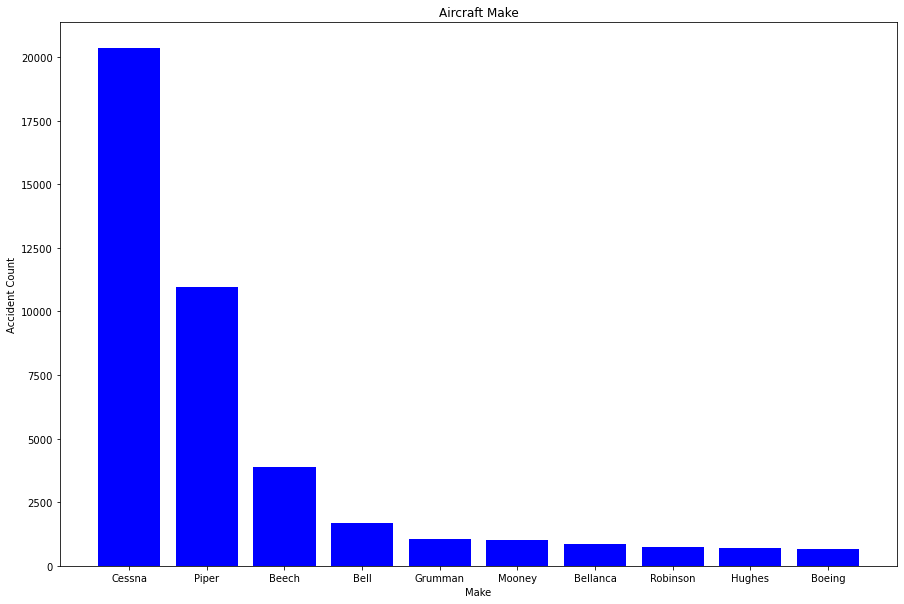

In [233]:
Make_counts=df['Make'].value_counts()

top_10=Make_counts.head(10)


plt.figure(figsize=(15,10))

plt.bar(top_10.index,top_10.values,color=['blue'])

plt.title('Aircraft Make')

plt.xlabel('Make')

plt.ylabel('Accident Count')

plt.show()

The make that had most accidents is Cessna followed by piper then Beech

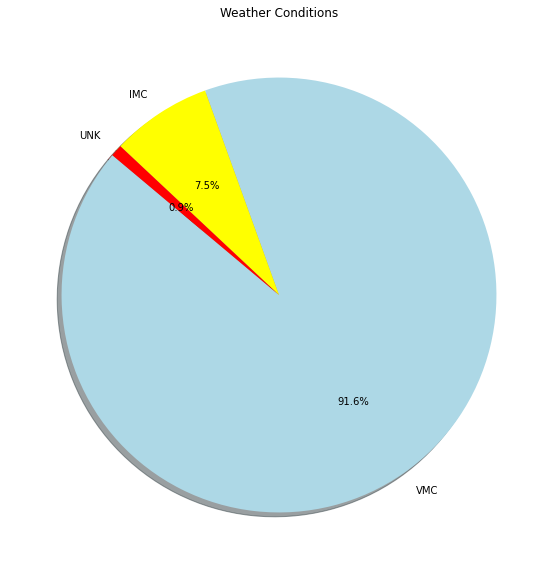

In [234]:
Weather_Condition_count=df['Weather.Condition'].value_counts()

labels=Weather_Condition_count.index
values=Weather_Condition_count.values
colour=['lightblue','yellow','red']

plt.figure(figsize=(15,10),facecolor='white')

plt.pie(values,labels=labels,colors=colour,autopct='%1.1f%%',shadow=True,startangle=140)

plt.title('Weather Conditions')

plt.show()

Generally the weather was good during most accidents.VMC-Visual metrological condition

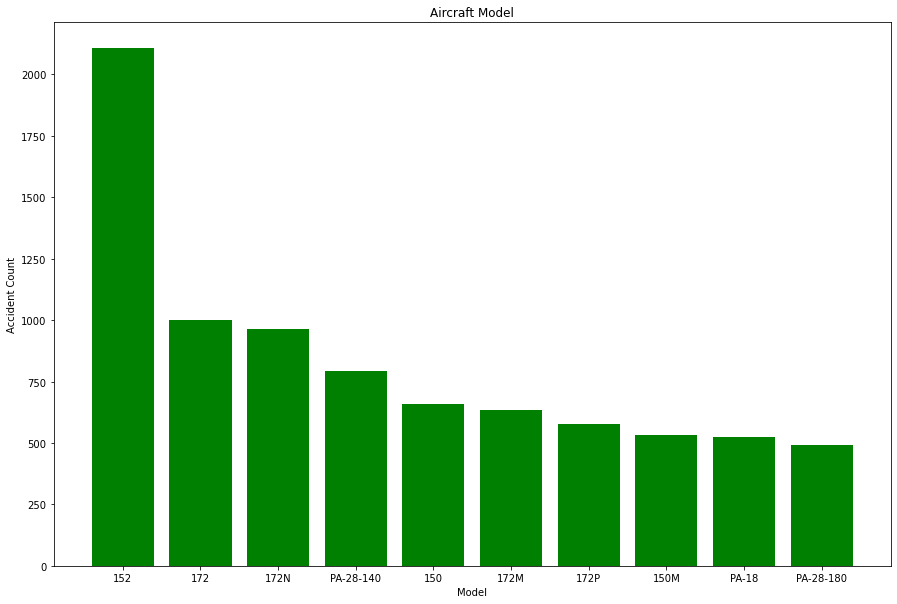

In [235]:
Model_counts=df['Model'].value_counts()

top_10=Model_counts.head(10)


plt.figure(figsize=(15,10))

plt.bar(top_10.index,top_10.values,color=['green'])

plt.title('Aircraft Model')

plt.xlabel('Model')

plt.ylabel('Accident Count')

plt.show()

The model with the most accidents is 152 and 172 then 172N.

# Recommendation

1. That the Boeing make is realiable and efficient based on the number of accidents while Cessna had a significant number of accidents .

2. PA -28-180 is more reliable, it had the least number of accidents with the model 152 having the highest.

3. During Summer exercise caution since there are more flights operating. 